# Power Plant Prediction

The given dataset is of power plants around India 

It gives information such as:

name fo the plant

its incorporation

data source 

owner

its location

the type of fuel generated

capacity of the plant

how much power was generated (year wise from 2013-2019)etc.

We have to analyse the data and make two predictions:

1.capacity_mw (Regression Analysis)

2.Primary_feul (Classification Analysis)

Let's look at the data and start with our analysis

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [3]:
data.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like the data has lot of missing values and unwanted columns. Lets look into the details

In [4]:
data.shape

(907, 27)

In [5]:
# Removing duplicates if any:
data=data.drop_duplicates(keep='first')
data.shape

(907, 27)

Seems like there are no duplicates

In [6]:
#check for info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

The data contains both numerical and categorical data
There is a lot of missing data
Few columns a empty ie.., they contain only null values
Lets take a closer look at the data


In [7]:
# checking for percentage of  missing values
((data.isna().sum())/907)*100

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

It is observed that the columns :


other fuel3 , wepp_id, generation in gwh_2013,generation in gwh 2019 and estimated generation gwh have 100% missing data

also other fuel 2 has 99.88% and other feul1 has 78.16% missing data 

Hence the above columns need to be deleted

In [8]:
data= data.drop(columns=['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'])
data.shape

(907, 20)

Now that we have deleted the columns with complete missing data, lets look at the unique values of the columns

In [9]:
data.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

Here, the columns country and country_long have only single value IND or India 

owner has quite a large % of missing data and will add no value to our analysis

url adds no value to our analysis
 
year_of capacity data also has a single value 2019

data genereation source is Central Electricity Authority for all 

name is the name of the plant which is different for all rows

gppd_idnr is the unique id given to every plant

deleting the above columns for the reasons mentioned here, as they will add no value to our analysis


In [10]:
data= data.drop(columns=['country','country_long','year_of_capacity_data','generation_data_source','name','gppd_idnr','owner','url'])
data.shape

(907, 12)

We have now deleted the columns that would add no values to our analysis

Let's fill in (impute) the missing data

In [11]:
data.head(10)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.7470,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,Coal,2005.0,Central Electricity Authority,WRI,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,Hydro,1970.0,Central Electricity Authority,WRI,157.558250,152.1952,61.421350,89.629600,48.327150
7,192.0,32.2258,77.2070,Hydro,2010.0,Central Electricity Authority,WRI,674.391100,721.3352,675.724400,679.594950,579.318850
8,290.0,16.3300,75.8863,Hydro,2004.0,Central Electricity Authority,WRI,480.594950,144.4342,402.029750,439.372100,406.377900
9,210.0,23.1642,81.6373,Coal,2008.0,Central Electricity Authority,WRI,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000


In [12]:
#checking for missing values
data.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [13]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   888 non-null    object 
 7   generation_gwh_2014  398 non-null    float64
 8   generation_gwh_2015  422 non-null    float64
 9   generation_gwh_2016  434 non-null    float64
 10  generation_gwh_2017  440 non-null    float64
 11  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(3)
memory usage: 92.1+ KB


from the above details of the dataset it is observed that

commissing_year, geolocation_source need to be imputed using the mode of the column

latitude,longitude,generation_gwh_2014 , generetion_gwh_2015, generation_gwh_2016, generation_gwh_2017 , generation_gwh_2018 need to be imputed with mean of the column



In [15]:
#Using Knn_imputer to impute
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
data.latitude=knn_imputer.fit_transform(data['latitude'].values.reshape(-1,1))[:,0]
data.longitude=knn_imputer.fit_transform(data['longitude'].values.reshape(-1,1))[:,0]
data.commissioning_year=knn_imputer.fit_transform(data['commissioning_year'].values.reshape(-1,1))[:,0]

#Using Simple Imputer:

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent',missing_values=np.NaN)
data.geolocation_source=si.fit_transform(data['geolocation_source'].values.reshape(-1,1))[:,0]

si_mean=SimpleImputer(missing_values=np.NaN)
data.generation_gwh_2014=si_mean.fit_transform(data['generation_gwh_2014'].values.reshape(-1,1))[:,0]
data.generation_gwh_2015=si_mean.fit_transform(data['generation_gwh_2015'].values.reshape(-1,1))[:,0]
data.generation_gwh_2016=si_mean.fit_transform(data['generation_gwh_2016'].values.reshape(-1,1))[:,0]
data.generation_gwh_2017=si_mean.fit_transform(data['generation_gwh_2017'].values.reshape(-1,1))[:,0]
data.generation_gwh_2018=si_mean.fit_transform(data['generation_gwh_2018'].values.reshape(-1,1))[:,0]





In [16]:
# let's extract power plant age from commissioning year by subtraction it from the year 2018
data['Power_plant_age'] = 2018 - data['commissioning_year']
data.drop(columns=['commissioning_year'],inplace=True)

By finding the age of the power plant can in the capacity of the plant 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
 11  Power_plant_age      907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 92.1+ KB


The dataset is now clean

DATA ANALYSIS

In [18]:
#Dividind data into numerical and categorical for analysis
N_data= data[['capacity_mw','latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']]
C_data= data[['primary_fuel','geolocation_source','source']]

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

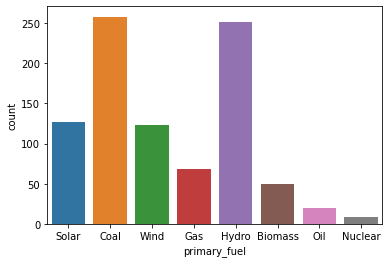

In [19]:
#Univatriate analysis:
sns.countplot(data['primary_fuel'])

It is obverved that there are 8 types of primary feuls used where 

Mostly coal and hydro is used followed by solar, wind, gas and biomass

Very few power plants use oil and nuclear as fuel

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

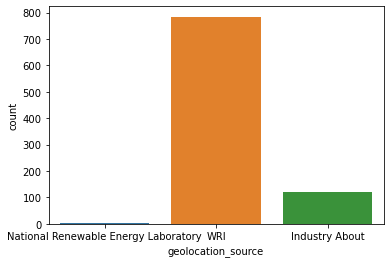

In [20]:
sns.countplot(data['geolocation_source'])

It is observed that goelocation source for most of the data is from WRI

Comparing primary_fuel to latitude and longitude

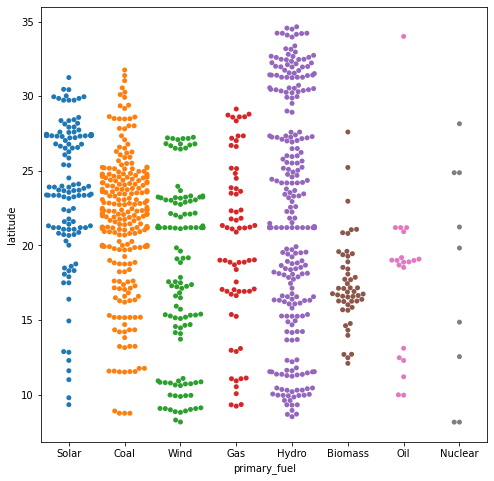

In [21]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='primary_fuel',y='latitude',data=data)
plt.show()

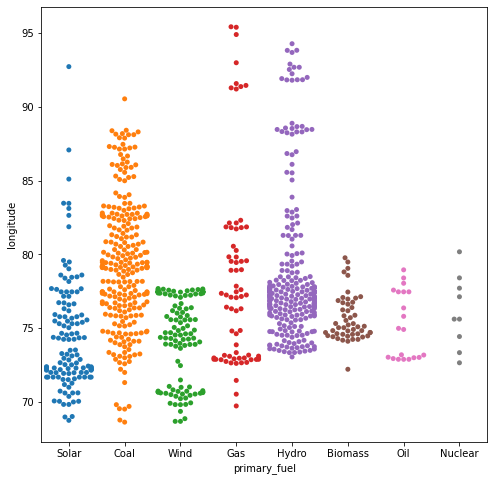

In [22]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='primary_fuel',y='longitude',data=data)
plt.show()

Since latitude and longitude give infomation about the location of the plant there could be a relation between the fuels used and location ie.,proximity to avalibility of certain fuels

From the above graphs we may say coal and hydro are used as primary fuels at higher altitudes

Plotting a graph of capacity vs age of the plant and capacity vs type of fuel

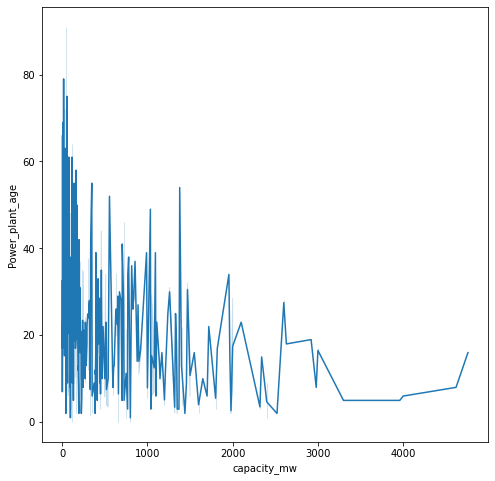

In [23]:
plt.figure(figsize=(8,8))
sns.lineplot(x='capacity_mw',y='Power_plant_age',data=data)
plt.show()

From the above plot it can be said that latest plants (plants built in last 20yrs) have a higher capacity than older plants

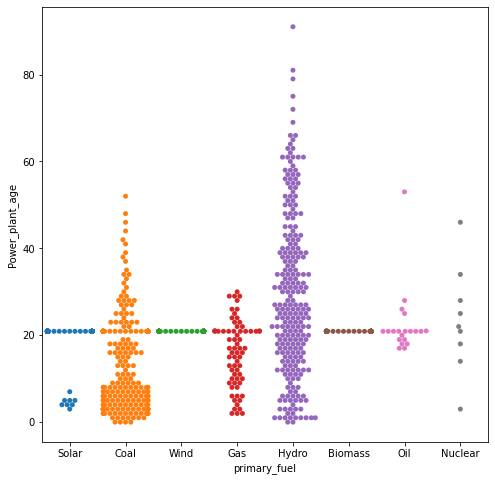

In [24]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='primary_fuel',y='Power_plant_age',data=data)
plt.show()

From the above graph we interpret that older plants mostly used caol and hydro as primary fuels 

Other fuels are used by plants 20years and younger

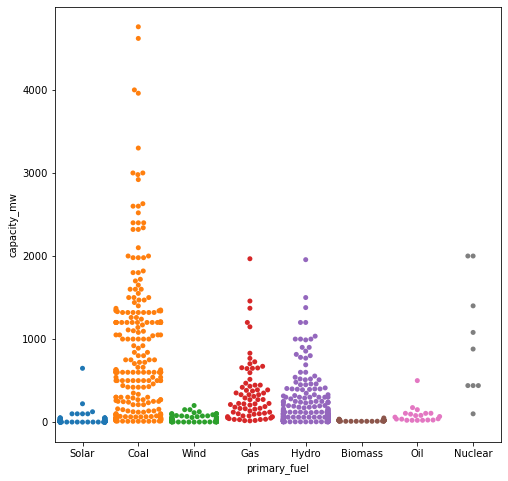

In [25]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='primary_fuel',y='capacity_mw',data=data)
plt.show()

From the above graph it is observed that Plants that use coal have the highest capacity

Gas Hydo and Nuclear plants have moderate capacity

Solar oil and biomass have least capacity

<function matplotlib.pyplot.show(close=None, block=None)>

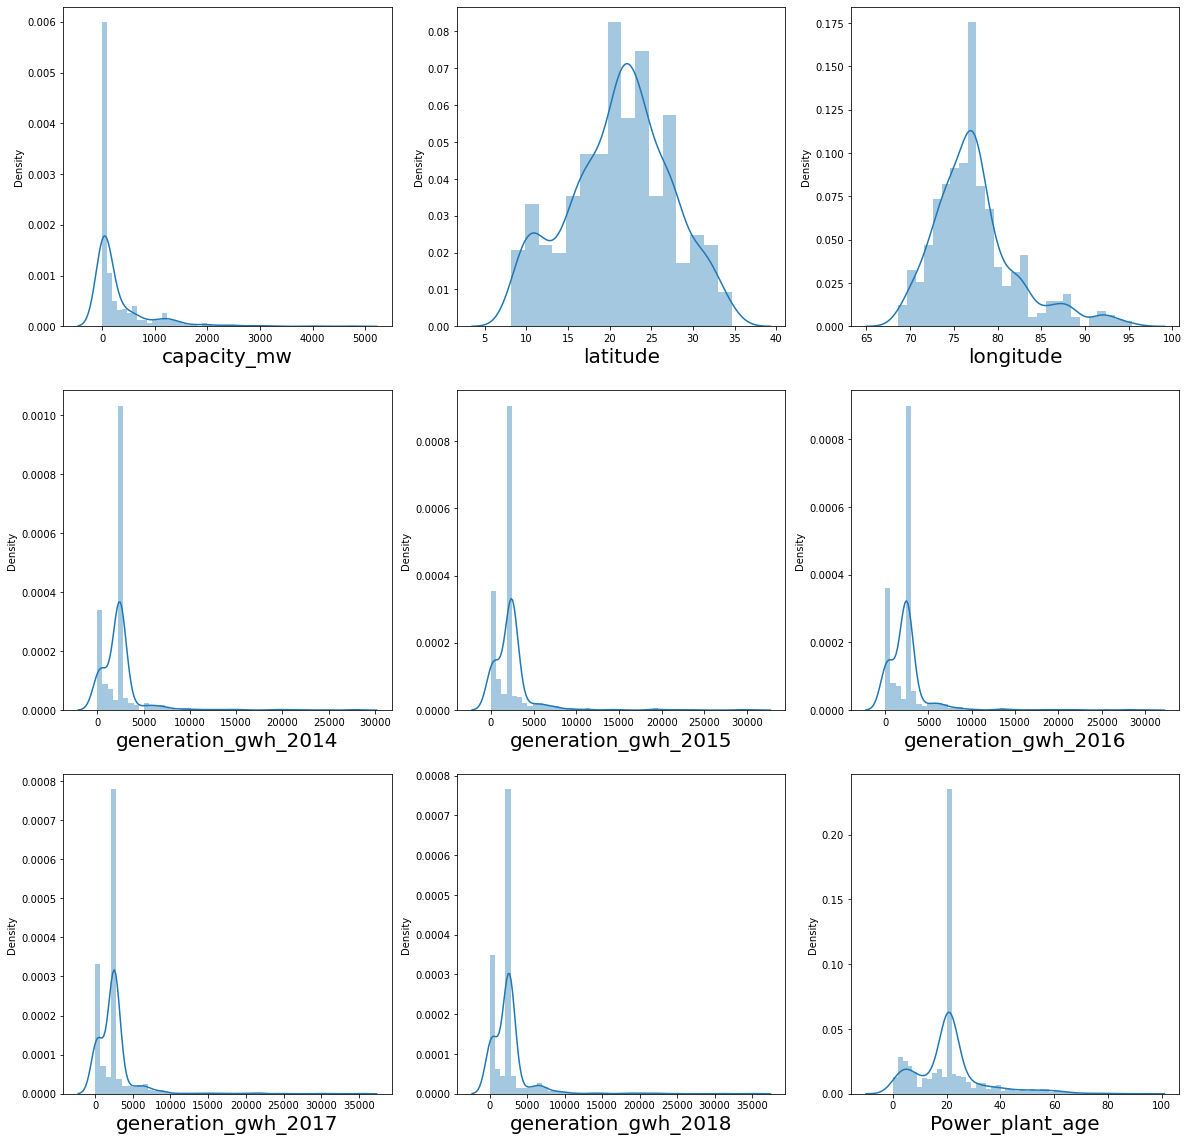

In [26]:
#Plotting graphs for numerical data
plt.figure(figsize=(20,20))
plotnumber = 1
for column in N_data:
    if plotnumber <=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(N_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

Some of the columns are skewed and have outliers

In [27]:
#checking for skewness
data.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
Power_plant_age        1.399359
dtype: float64

 From the above observation we conclude that the dataset is skewed
 Lets check for outliers
 inorder to do so we need to encode our dataset

In [28]:
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [29]:
data.head(10)

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,98.0,24.7663,74.6090,1,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,39.2,21.9038,69.3732,7,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,135.0,23.8712,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,1800.0,21.9603,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000
5,250.0,23.7689,68.6447,1,22,2,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,13.000000
6,60.0,10.4547,77.0078,3,22,2,157.558250,152.195200,61.421350,89.629600,48.327150,48.000000
7,192.0,32.2258,77.2070,3,22,2,674.391100,721.335200,675.724400,679.594950,579.318850,8.000000
8,290.0,16.3300,75.8863,3,22,2,480.594950,144.434200,402.029750,439.372100,406.377900,14.000000
9,210.0,23.1642,81.6373,1,22,2,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,10.000000


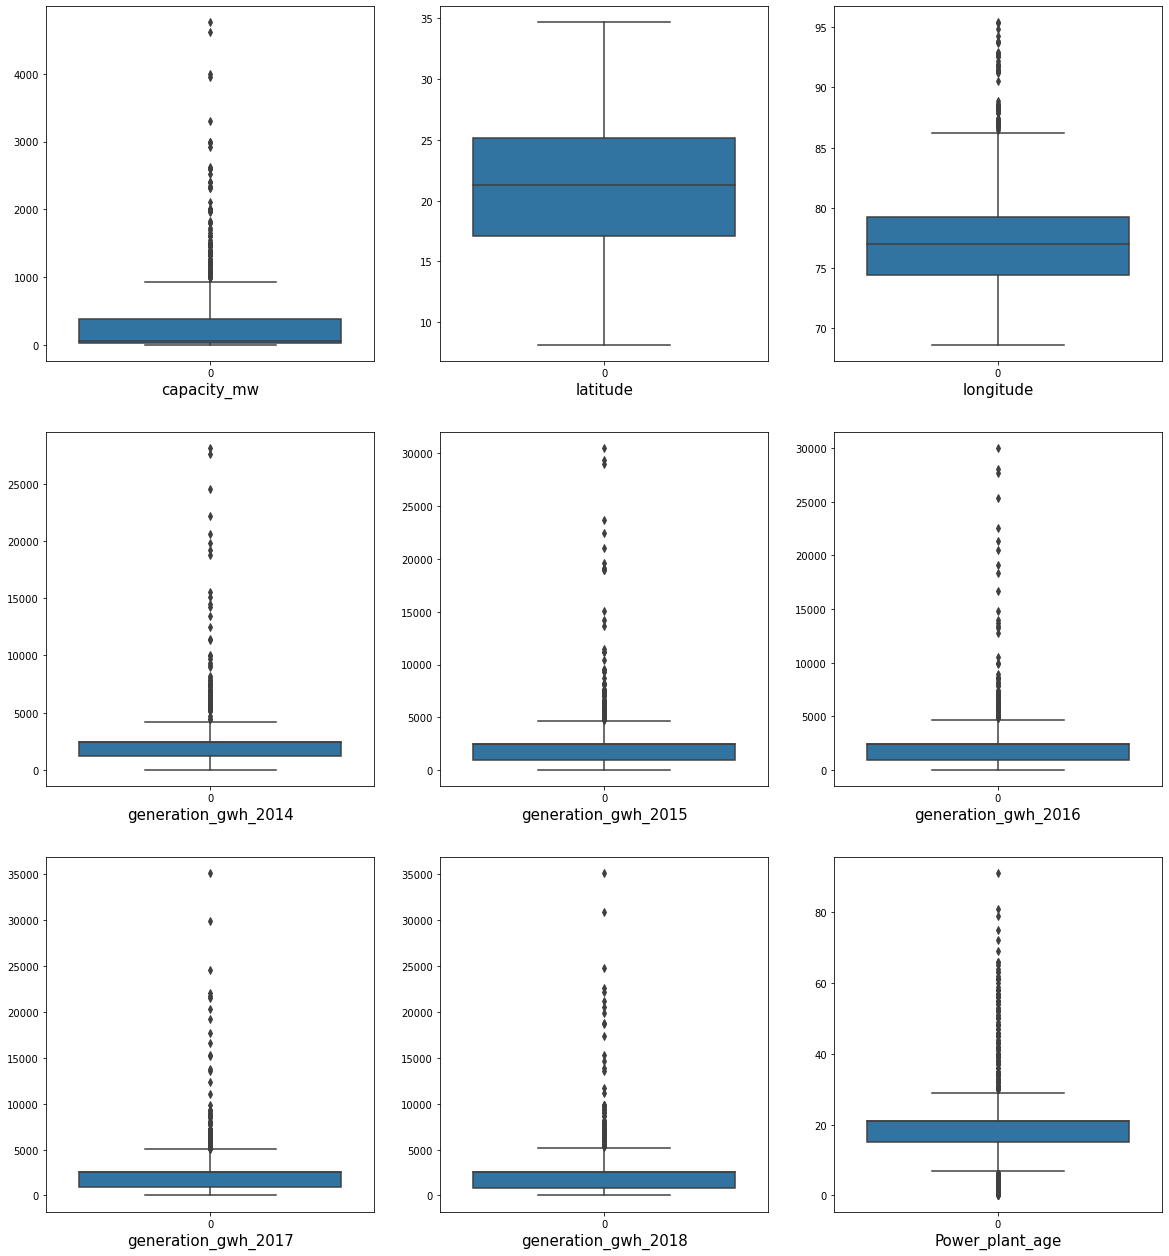

In [30]:
# Checking for outliers using boxplot
plt.figure(figsize=(20,30))
graph =1
for column in N_data:
    if graph <=11:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=N_data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

from the above graphs we can say that  all numerical columns have outliers which is leading to skewness of data 

In [31]:
# Using z-score to detect and treat the outliers
features=N_data.drop('capacity_mw',axis=1)
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
c_outliers=np.where(z>3)
c_outliers

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 158, 179, 183, 209,
        209, 209, 209, 209, 222, 244, 308, 308, 308, 308, 308, 323, 333,
        340, 342, 360, 364, 364, 364, 364, 364, 371, 416, 427, 444, 454,
        478, 484, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 499,
        519, 538, 541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648,
        648, 648, 648, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695,
        706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726,
        726, 726, 726, 728, 786, 786, 786, 786, 786, 807, 808, 808, 808,
        808, 808, 818, 847, 848, 880, 880, 880, 880, 880], dtype=int64),
 array([3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 1, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4,
        5, 6, 1, 1, 1, 7, 1, 2, 3, 4, 5, 6, 7, 1, 1, 7, 7, 7, 7, 2, 3, 4,
        5, 6, 2, 3, 4, 5, 6, 1, 1, 7, 7, 1, 7, 1, 7, 7, 7, 7, 1, 2, 3, 4,
        5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 7, 7, 2, 3, 4, 6, 2, 3, 4, 5,
        6, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 

In [32]:
new_data=data.drop(c_outliers[0])
new_data

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,98.0,24.7663,74.6090,1,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,39.2,21.9038,69.3732,7,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,135.0,23.8712,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,1800.0,21.9603,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000,2.000000
903,3.0,12.8932,78.1654,6,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
904,25.5,15.2758,75.5811,7,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
905,80.0,24.3500,73.7477,1,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918


In [33]:
data_loss=((907-855)/907)*100
data_loss

5.733186328555679

In [34]:
#checking for skewness
new_data.skew()

capacity_mw            2.163488
latitude              -0.110936
longitude              0.917381
primary_fuel           0.420074
source                 1.741703
geolocation_source    -2.074380
generation_gwh_2014    1.525975
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2017    1.293269
generation_gwh_2018    1.421012
Power_plant_age        0.836962
dtype: float64

After deleting the outliers the data is still slighty skewed 

Since the data loss is less than 5% we will use the new dataframe

and will use power transformer in the futher steps to reduce the skewness

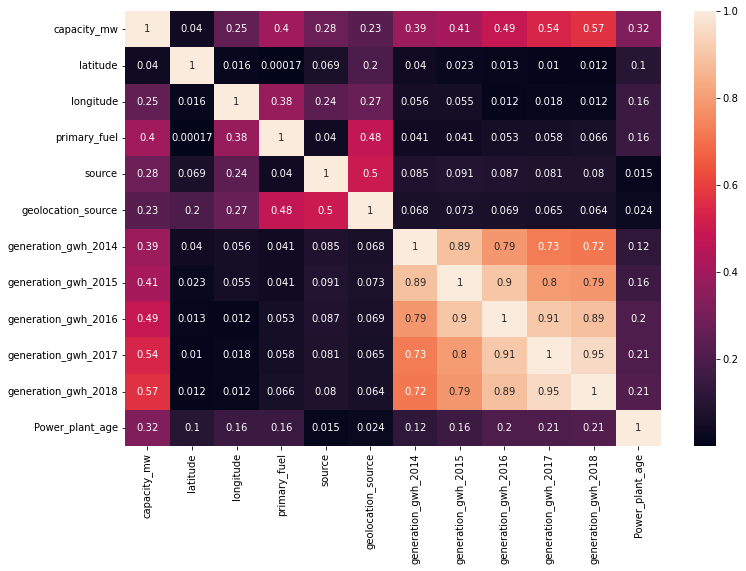

In [35]:
# Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = new_data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()


We observe:

generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018 have a strong relationship among them this could be generation of power every year being almost same with a slight variance

latitude has no relation with primary_fuel



Regression Model Building:

In [36]:
# Dividing data into feature and label
X= new_data.drop(columns=['capacity_mw'])
Y= new_data['capacity_mw']

In [37]:
#Applying PowerTransformer
pt = PowerTransformer()
X_scaled = pd.DataFrame(pt.fit_transform(X), columns=X.columns)


In [38]:
X_scaled

,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,1.167827,-0.932921,1.137091,1.532355,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994,-1.213550
1,0.596640,-0.513810,-0.994265,1.986063,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
2,0.122069,-2.368066,1.407230,-0.486798,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
3,0.447846,2.447853,-0.377697,-0.420135,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602,-0.448307
4,0.131399,1.253377,-0.994265,-0.420135,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635,-1.768974
...,...,...,...,...,...,...,...,...,...,...,...
850,-0.795932,0.216288,-0.994265,-0.420135,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856,-1.936692
851,-1.343416,0.406355,1.137091,1.162950,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
852,-0.960773,-0.239580,1.407230,-0.486798,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
853,0.527395,-0.772877,-0.994265,0.860180,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035


In [39]:
X_scaled.skew()

latitude              -0.068504
longitude             -0.000494
primary_fuel          -0.056452
source                -0.176122
geolocation_source    -2.047591
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
Power_plant_age        0.003358
dtype: float64

After applying powertransform the skewness is under control for all numerical features

In [40]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X_scaled.columns
vif

,vif,feature
0,1.071181,latitude
1,1.275875,longitude
2,1.610341,primary_fuel
3,1.350492,source
4,1.758018,geolocation_source
5,4.132751,generation_gwh_2014
6,7.735862,generation_gwh_2015
7,10.659314,generation_gwh_2016
8,11.567000,generation_gwh_2017
9,11.336628,generation_gwh_2018


The vifs for generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 are a little high but this could be because the plants generate almost the same power every year


Since the vifs look ok

Lets build the models

In [41]:
#traintestsplit
lr = LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",r2_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",r2_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  13 the model performs well
Acuraccy of training model : 43.66667992082477
Accuracy of testing model : 43.50011292637359

-----------------------------------------

At random state  14 the model performs well
Acuraccy of training model : 43.944661347716085
Accuracy of testing model : 43.64355689722975

-----------------------------------------

At random state  44 the model performs well
Acuraccy of training model : 43.98908254098374
Accuracy of testing model : 44.097182382349544

-----------------------------------------

At random state  141 the model performs well
Acuraccy of training model : 43.99634394933892
Accuracy of testing model : 44.194439208552936

-----------------------------------------

At random state  145 the model performs well
Acuraccy of training model : 44.15632079612
Accuracy of testing model : 43.875785480711556

-----------------------------------------

At random state  148 the model performs well
Acuraccy of training model : 43.89777757719757


Selecting the random state as 145 since the r2 score for test and train data is almost equal

In [42]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = 145)

In [43]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    mse = mean_squared_error(y_test,pred_test)
    mae = mean_absolute_error(y_test,pred_test)

    print (algorithm)
    print ("Acuraccy of training model :",r2_score(y_train,pred_train))
    print ("Accuracy of testing model :",r2_score(y_test,pred_test))
    print ("MAE: ",mae )
    print ("RMSE : ",sqrt(mse))
    print ("\n-----------------------------------------\n")

In [44]:
#Training Model
#Linear Regression
lr= LinearRegression()
model_selection(lr,x_train,y_train,x_test,y_test)


#Decision Tree
dtr = DecisionTreeRegressor()
model_selection(dtr,x_train,y_train,x_test,y_test)

#Random Forest 
rf= RandomForestRegressor()
model_selection(rf,x_train,y_train,x_test,y_test)

#Support Vector Regressor:
gb = GradientBoostingRegressor()
model_selection(gb,x_train,y_train,x_test,y_test)



LinearRegression()
Acuraccy of training model : 0.44156320796119997
Accuracy of testing model : 0.4387578548071156
MAE:  263.4610441175756
RMSE :  378.1462715806164

-----------------------------------------

DecisionTreeRegressor()
Acuraccy of training model : 0.9999494092191498
Accuracy of testing model : 0.5798135288209191
MAE:  163.31318016614745
RMSE :  327.1942910277666

-----------------------------------------

RandomForestRegressor()
Acuraccy of training model : 0.9654682642721923
Accuracy of testing model : 0.7730316028392508
MAE:  118.69507936732919
RMSE :  240.47358620890714

-----------------------------------------

GradientBoostingRegressor()
Acuraccy of training model : 0.9464132640696123
Accuracy of testing model : 0.7603477170878765
MAE:  129.56558411554244
RMSE :  247.1015501973191

-----------------------------------------



In [45]:
# Hyperparameter Tuning:
parameters = {'n_estimators':(25,50,75,100),
              'criterion':['squared_error', 'absolute_error', 'friedman_mse'],
    'max_features':['sqrt','log2'],
    'max_depth': (6,8,11),
    'min_samples_leaf': (3,5),
    'min_samples_split':range(3,6)
    }

clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [46]:
rf1= RandomForestRegressor(n_estimators=25,criterion='friedman_mse',max_features='sqrt', max_depth = 11, min_samples_leaf = 3, min_samples_split = 4)
model_selection(rf1,x_train,y_train,x_test,y_test)

RandomForestRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=4, n_estimators=25)
Acuraccy of training model : 0.8897667429628371
Accuracy of testing model : 0.7837167426270013
MAE:  113.4673201425894
RMSE :  234.74488375222174

-----------------------------------------



The testing accuracy has increased and MAE and RMSE has reduced after tunning the parameters so selecting tunned random forests as our predicting model

In [47]:
# Saving Model
import pickle
filename= 'PowerPlant_reg.pkl'
pickle.dump(rf1,open(filename, 'wb'))

In [48]:
#Final Prediction
a= np.array(y_test)
predicted=np.array (rf1.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,350.0,534.595312
1,234.0,86.697383
2,62.5,157.442277
3,1340.0,1360.619687
4,24.0,35.623410
...,...,...
209,4.5,17.136406
210,10.0,34.089386
211,10.0,17.158219
212,135.0,261.638022


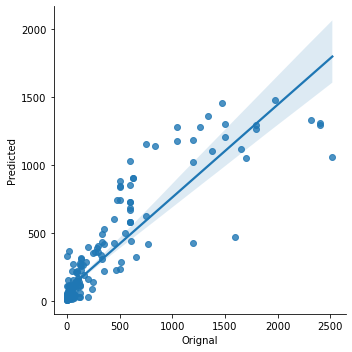

In [49]:
sns.lmplot(x='Orignal',y='Predicted',data=df)

Building Classification model

In [50]:
# Dividing data into feature and label
x= new_data.drop(columns=['primary_fuel'])
y= new_data['primary_fuel']

In [51]:
#Applying PowerTransformer
pt = PowerTransformer()
x_scaled = pd.DataFrame(pt.fit_transform(x), columns=x.columns)

In [52]:
x_scaled

,capacity_mw,latitude,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677941,1.167827,-0.932921,1.532355,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994,-1.213550
1,0.214914,0.596640,-0.513810,1.986063,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
2,-0.278156,0.122069,-2.368066,-0.486798,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
3,0.385690,0.447846,2.447853,-0.420135,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602,-0.448307
4,1.720052,0.131399,1.253377,-0.420135,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635,-1.768974
...,...,...,...,...,...,...,...,...,...,...,...
850,1.661330,-0.795932,0.216288,-0.420135,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856,-1.936692
851,-1.598870,-1.343416,0.406355,1.162950,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
852,-0.510387,-0.960773,-0.239580,-0.486798,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035
853,0.106203,0.527395,-0.772877,0.860180,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.184035


In [53]:
x_scaled.skew()

capacity_mw            0.016759
latitude              -0.068504
longitude             -0.000494
source                -0.176122
geolocation_source    -2.047591
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
Power_plant_age        0.003358
dtype: float64

In [54]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif= pd.DataFrame()
Vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif['feature']= x_scaled.columns
Vif

,vif,feature
0,1.603202,capacity_mw
1,1.089026,latitude
2,1.212846,longitude
3,1.248155,source
4,1.565853,geolocation_source
5,4.138277,generation_gwh_2014
6,7.733708,generation_gwh_2015
7,10.668995,generation_gwh_2016
8,11.598238,generation_gwh_2017
9,11.336174,generation_gwh_2018


The vifs for generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 are a little high but this could be because the plants generate almost the same power every year

Lets look at the label
Plotting Count graph for primary_fuel

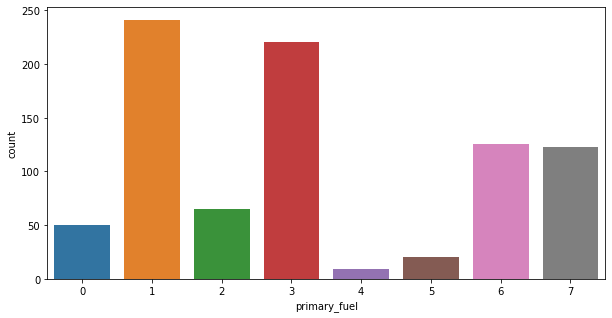

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(y)
plt.show()

The target is imbalanced 
Balancing it using SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
#traintestsplit
x_train_,x_test,y_train,y_test = train_test_split (x_scaled,y, test_size=0.25, random_state = 285)

In [58]:
x_train,y_train = SMOTE().fit_resample(x_train,y_train)

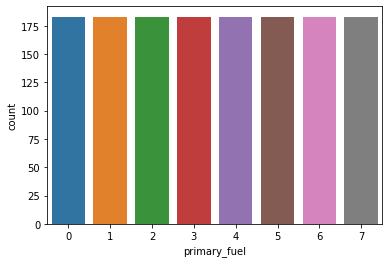

In [59]:
sns.countplot(y_train)
plt.show()

The label is now balanced 
Let's now start building the model

In [60]:
#traintestsplit
lg = LogisticRegression()
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split (x_scaled,y, test_size=0.25, random_state = i)
    lg.fit(x_train,y_train)
    pred_train = lg.predict(x_train)
    pred_test = lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",accuracy_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",accuracy_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  4 the model performs well
Acuraccy of training model : 70.67082683307332
Accuracy of testing model : 71.49532710280374

-----------------------------------------

At random state  10 the model performs well
Acuraccy of training model : 71.45085803432137
Accuracy of testing model : 70.56074766355141

-----------------------------------------

At random state  21 the model performs well
Acuraccy of training model : 71.7628705148206
Accuracy of testing model : 71.96261682242991

-----------------------------------------

At random state  25 the model performs well
Acuraccy of training model : 71.45085803432137
Accuracy of testing model : 71.02803738317756

-----------------------------------------

At random state  36 the model performs well
Acuraccy of training model : 70.04680187207488
Accuracy of testing model : 70.09345794392523

-----------------------------------------

At random state  38 the model performs well
Acuraccy of training model : 72.07488299531981
Accura

At random state  385 the model performs well
Acuraccy of training model : 72.07488299531981
Accuracy of testing model : 71.96261682242991

-----------------------------------------

At random state  389 the model performs well
Acuraccy of training model : 71.45085803432137
Accuracy of testing model : 71.02803738317756

-----------------------------------------

At random state  398 the model performs well
Acuraccy of training model : 72.69890795631825
Accuracy of testing model : 73.36448598130842

-----------------------------------------

At random state  401 the model performs well
Acuraccy of training model : 71.29485179407176
Accuracy of testing model : 71.49532710280374

-----------------------------------------

At random state  415 the model performs well
Acuraccy of training model : 71.7628705148206
Accuracy of testing model : 71.96261682242991

-----------------------------------------

At random state  420 the model performs well
Acuraccy of training model : 72.23088923556942

Selecting 135 as random state

In [61]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (x_scaled,y, test_size=0.25, random_state = 135)

In [62]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    
    print(algorithm)
    print ("Acuraccy of training model :",accuracy_score(y_train,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    print ("\n-----------------------------------------\n")
    
        

In [63]:
#Logistic Regression
lr= LogisticRegression()
model_selection(lr,x_train,y_train,x_test,y_test)

#KNN
knn= KNeighborsClassifier()
model_selection(knn,x_train,y_train,x_test,y_test)

#Decision Tree
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

#Random Forest 
rfc= RandomForestClassifier()
model_selection(rfc,x_train,y_train,x_test,y_test)

#GradientBoostingClassifier
gbc= GradientBoostingClassifier()
model_selection(gbc,x_train,y_train,x_test,y_test)



LogisticRegression()
Acuraccy of training model : 0.7223088923556942
Accuracy of testing model : 0.719626168224299
Confusion Matrix 
 [[10  0  0  1  0  0  0  2]
 [ 4 43  0  9  1  0  0  1]
 [ 1  9  4  7  0  1  0  0]
 [ 0  7  0 38  0  0  0  7]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  3  0  0  0  0 29  0]
 [ 0  0  0  2  0  0  0 30]]

-----------------------------------------

KNeighborsClassifier()
Acuraccy of training model : 0.8408736349453978
Accuracy of testing model : 0.7570093457943925
Confusion Matrix 
 [[12  1  0  0  0  0  0  0]
 [ 4 43  0  5  0  0  0  6]
 [ 1  6  6  8  0  1  0  0]
 [ 0  2  1 40  0  0  0  9]
 [ 0  1  0  0  0  0  0  1]
 [ 0  0  0  3  0  0  0  0]
 [ 1  2  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]

-----------------------------------------

DecisionTreeClassifier()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.8084112149532711
Confusion Matrix 
 [[12  1  0  0  0  0  0  0]
 [ 6 39  3  4  2  3  0  1]
 [ 0  4 10  3  0  5  0  0]
 [

Since Random Forests and GradientBoostingClassifier all have good accuracy lets Tune their parameters and check if we can make the model better

In [64]:
# Hyperparameter Tuning :
#RandomForests
parameters = {'criterion':['gini','entropy'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(3,7),
    'min_samples_split':range(3,6),
    'n_estimators':(50,75,100)
    }

clf = GridSearchCV(rfc,parameters)
clf.fit(x_train,y_train)
print ("RandomForests: \n",clf.best_params_)

#GradientBoostingClassifier
parameters = {'criterion':['friedman_mse','squared_error'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[0,50,100],
            'max_depth':[2,3,4,5,6,8]
             }
clf = GridSearchCV(gbc,parameters)
clf.fit(x_train,y_train)
print ("GradientBoostingClassifier: \n",clf.best_params_)

RandomForests: 
 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
GradientBoostingClassifier: 
 {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [69]:
#Random Forest 
rfc1= RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=3,min_samples_split=5,n_estimators=100)
model_selection(rfc1,x_train,y_train,x_test,y_test)

#GradientBoostingClassifier 
gbc1= GradientBoostingClassifier(criterion='friedman_mse',max_depth=5,max_features='sqrt',n_estimators=100)
model_selection(gbc1,x_train,y_train,x_test,y_test)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=5)
Acuraccy of training model : 0.9453978159126365
Accuracy of testing model : 0.8598130841121495
Confusion Matrix 
 [[12  1  0  0  0  0  0  0]
 [ 1 51  0  4  0  0  0  2]
 [ 1  5  8  7  0  1  0  0]
 [ 0  2  0 50  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  1  0  0  2  0  0]
 [ 0  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]

-----------------------------------------

GradientBoostingClassifier(max_depth=5, max_features='sqrt')
Acuraccy of training model : 1.0
Accuracy of testing model : 0.8738317757009346
Confusion Matrix 
 [[12  1  0  0  0  0  0  0]
 [ 3 49  0  5  0  0  0  1]
 [ 1  4 12  2  0  3  0  0]
 [ 0  2  0 50  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  1  0  0  2  0  0]
 [ 0  2  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 32]]

-----------------------------------------



After observing the results of Hyperparameter Tunning Selecting GradientBoostingClassifier as the best model

In [70]:
# Saving Model
import pickle
filename= 'PowerPlant_clf.pkl'
pickle.dump(gbc,open(filename, 'wb'))

In [71]:
#Final Prediction
a= np.array(y_test)
predicted=np.array (gbc.predict(x_test))
df1 = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df1

,Orignal,Predicted
0,6,6
1,7,7
2,3,3
3,2,2
4,1,1
...,...,...
209,1,1
210,6,6
211,1,1
212,7,7
